In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mq_glip_sam2_joint_model import MQGLIPSam2JointModel


def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

/home/jielei/miniconda/envs/ov_det/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:313: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:378: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:428: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` i

In [3]:
mq_glip_sam2_joint_model = MQGLIPSam2JointModel()

VISION BACKBONE USE GRADIENT CHECKPOINTING:  False


/home/jielei/miniconda/envs/ov_det/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False


Some weights of QVBertModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['encoder.qv_layer.0.attn.norm.bias', 'encoder.qv_layer.0.attn.norm.weight', 'encoder.qv_layer.0.attn.norm_kv.bias', 'encoder.qv_layer.0.attn.norm_kv.weight', 'encoder.qv_layer.0.attn.to_kv.weight', 'encoder.qv_layer.0.attn.to_out.weight', 'encoder.qv_layer.0.attn.to_q.weight', 'encoder.qv_layer.0.attn_gate.linear1.weight', 'encoder.qv_layer.0.attn_gate.linear2.weight', 'encoder.qv_layer.0.attn_gate.norm.bias', 'encoder.qv_layer.0.attn_gate.norm.weight', 'encoder.qv_layer.0.ff.linear1.weight', 'encoder.qv_layer.0.ff.linear2.weight', 'encoder.qv_layer.0.ff.norm.bias', 'encoder.qv_layer.0.ff.norm.weight', 'encoder.qv_layer.0.ff_gate', 'encoder.qv_layer.1.attn.norm.bias', 'encoder.qv_layer.1.attn.norm.weight', 'encoder.qv_layer.1.attn.norm_kv.bias', 'encoder.qv_layer.1.attn.norm_kv.weight', 'encoder.qv_layer.1.attn.to_kv.weight', 'encoder.qv_layer.1.attn.to_out.weight

EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


Some layers unloaded with pre-trained weight: 
rpn.head.cls_logits.{bias, weight}


# data

In [4]:
video_dir = "/home/jielei/sam2/notebooks/videos/bedroom"
prompt_box = np.array([300, 0, 500, 400], dtype=np.float32) # copied from sam2 notebook
text_prompt = "pillow"

In [5]:
frame_idx_to_run_image_grounding = 90
video_frame_paths = mq_glip_sam2_joint_model.get_frame_paths(video_dir)
image_path_for_grounding = video_frame_paths[frame_idx_to_run_image_grounding]

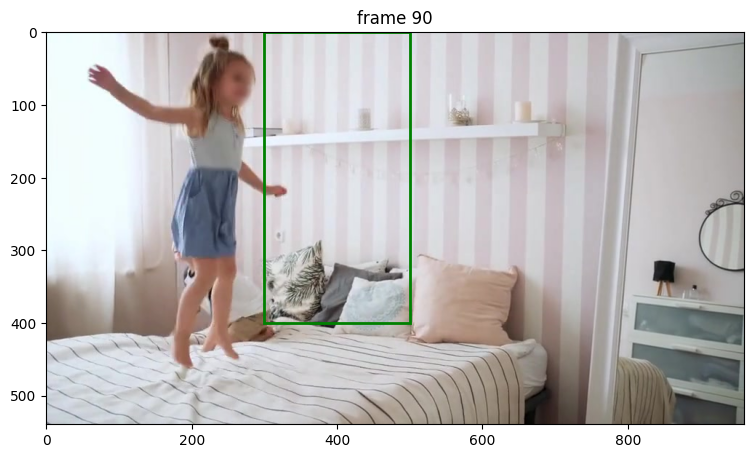

In [6]:
# show the given box
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx_to_run_image_grounding}")
plt.imshow(Image.open(image_path_for_grounding))
show_box(prompt_box, plt.gca())

# Run image grounding - text only

In [7]:
grounding_results_text_only = mq_glip_sam2_joint_model.run_image_grounding(
    image_path_for_grounding, 
    text_prompt=text_prompt, 
    box_prompt=None, 
    box_prompt_mode="xyxy"
)

[[[0, 6]]]


/home/jielei/miniconda/envs/ov_det/lib/python3.10/site-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/modeling/rpn/vldyhead.py:224: UserWarning: `nn.functional.upsample_bilinear` is deprecated. Use `nn.functional.interpolate` instead.
  temp_fea.append(F.upsample_bilinear(self.DyConv[0](visual_feats[level + 1], **conv_args),


In [8]:
grounding_results_text_only

{'bbox': [[231.2789764404297,
   287.7982482910156,
   652.8214721679688,
   433.0870666503906],
  [295.8597412109375, 286.1637268066406, 387.1779479980469, 400.206787109375],
  [497.32696533203125,
   305.9603271484375,
   649.8797607421875,
   431.4630126953125]],
 'scores': [0.623054027557373, 0.525066614151001, 0.5067640542984009]}

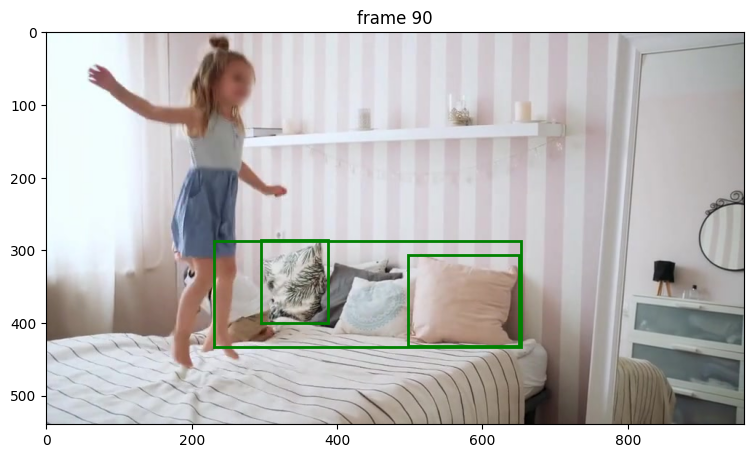

In [9]:
# show the given box
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx_to_run_image_grounding}")
plt.imshow(Image.open(image_path_for_grounding))
boxes = grounding_results_text_only["bbox"]
for box in boxes:
    show_box(box, plt.gca())

# Run image grounding - text + box

In [10]:
run_grounding_text_box = False
if run_grounding_text_box:
    grounding_results_text_box = mq_glip_sam2_joint_model.run_image_grounding(
        image_path_for_grounding, 
        text_prompt="child", 
        box_prompt=[prompt_box], 
        box_prompt_mode="xyxy",
    )
    
    print(f"grounding_results_text_box {grounding_results_text_box}")
    # show the given box
    plt.figure(figsize=(9, 6))
    plt.title(f"frame {frame_idx_to_run_image_grounding}")
    plt.imshow(Image.open(image_path_for_grounding))
    boxes = grounding_results_text_box["bbox"]
    for box in boxes:
        show_box(box, plt.gca())

# Run tracking

In [11]:
video_segments = mq_glip_sam2_joint_model.run_sam2_tracking(
    video_dir, 
    grounding_results_text_only, 
    grounding_frame_idx=frame_idx_to_run_image_grounding
)

propagate in video: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:12<00:00,  7.30it/s]


In [12]:
video_segments.keys()

dict_keys([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [18]:
video_segments[0].keys()

[nltk_data] Downloading package punkt to /home/jielei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jielei/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


dict_keys([0, 1, 2])

In [20]:
video_segments[0][0].shape

(1, 540, 960)

In [22]:
type(video_segments[0][0])

numpy.ndarray

In [ ]:
def collect_masks_in_batch(sam2_video_segments):
    """
    sam2_video_segments
        sam2_video_segments.keys(): frame indices
        sam2_video_segments[0].keys(): object ids
        sam2_video_segments[0][0].shape: e.g., (1, 540, 960)
        sam2_video_segments[0][0].dtype: dtype('bool')
        type(video_segments[0][0]): numpy.ndarray
    """
    

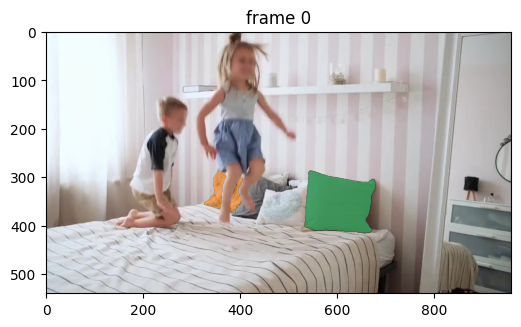

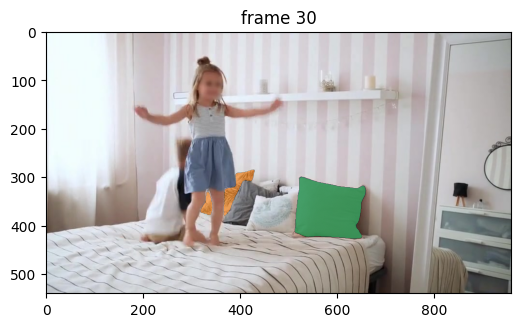

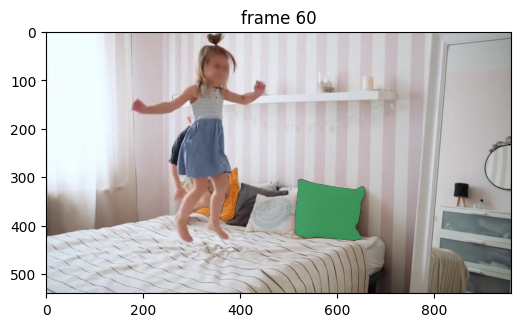

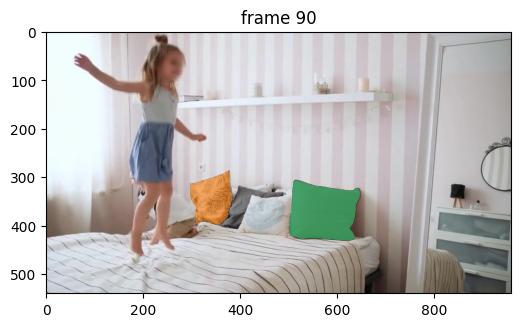

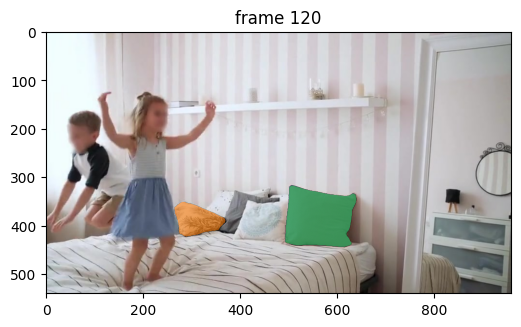

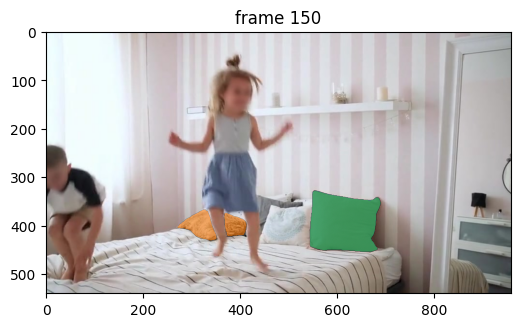

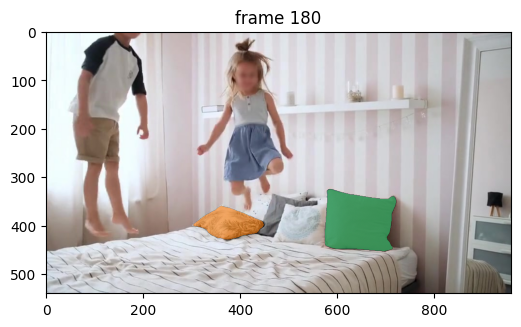

In [13]:
# render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")
for out_frame_idx in range(0, len(video_frame_paths), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(video_frame_paths[out_frame_idx]))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)

In [16]:
type(video_segments[0])

dict

In [17]:
video_segments[0].keys()

dict_keys([0, 1, 2])

In [14]:
# grounding_results = grounding_results_text_only
# grounding_frame_idx = frame_idx_to_run_image_grounding

# ####
# inference_state = mq_glip_sam2_joint_model.sam2_predictor.init_state(video_path=video_dir)
# # segment object with box prompt
# for obj_id, box in enumerate(grounding_results['bbox']):
#     box = np.array(box, dtype=np.float32)
#     _, out_obj_ids, out_mask_logits = mq_glip_sam2_joint_model.sam2_predictor.add_new_points_or_box(
#         inference_state=inference_state,
#         frame_idx=grounding_frame_idx,
#         obj_id=obj_id,
#         box=box,
#     )

# # run propagation throughout the video and collect the results in a dict
# video_segments = {}  # video_segments contains the per-frame segmentation results
# for out_frame_idx, out_obj_ids, out_mask_logits in \
#     mq_glip_sam2_joint_model.sam2_predictor.propagate_in_video(
#         inference_state,
#         # start_frame_idx=0
#     ):
#     video_segments[out_frame_idx] = {
#         out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
#         for i, out_obj_id in enumerate(out_obj_ids)
#     }

In [15]:
# for out_frame_idx, out_obj_ids, out_mask_logits in \
#     mq_glip_sam2_joint_model.sam2_predictor.propagate_in_video(
#         inference_state,
#         reverse=True
#     ):
#     video_segments[out_frame_idx] = {
#         out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
#         for i, out_obj_id in enumerate(out_obj_ids)
#     }